In [204]:
import pandas as pd
import numpy as np

I preprocess the data from Yahoo Finance by computing MACD histogram and RSI, trying to be able to better predict the stock price based on two popular stock price indicators.

## Apple

In [205]:
#First, make prediction on AAPL
apple = pd.read_csv("AAPL.csv")

In [206]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,12-day EMA,26-day EMA,MACD line,Signal line,MACD histogram,Up,Down,SMA Up,SMA Down,RS,RSI
0,9/11/2015,27.947500,28.552500,27.940001,28.552500,26.3858,199662000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/14/2015,29.145000,29.222500,28.715000,28.827499,26.6399,233453600,NaN,NaN,NaN,NaN,NaN,0.2541,0.0000,NaN,NaN,NaN,NaN
2,9/15/2015,28.982500,29.132500,28.605000,29.070000,26.8640,173364800,NaN,NaN,NaN,NaN,NaN,0.2241,0.0000,NaN,NaN,NaN,NaN
3,9/16/2015,29.062500,29.135000,28.860001,29.102501,26.8940,148694000,NaN,NaN,NaN,NaN,NaN,0.0300,0.0000,NaN,NaN,NaN,NaN
4,9/17/2015,28.915001,29.122499,28.430000,28.480000,26.3188,256450400,NaN,NaN,NaN,NaN,NaN,0.0000,0.5753,NaN,NaN,NaN,NaN


There are some NaN cells, due to the fact that Moving Average cannot be calculated for several first data. I will access the issue when cleaning data later.

In [207]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume,12-day EMA,26-day EMA,MACD line,Signal line,MACD histogram,Up,Down,SMA Up,SMA Down,RS,RSI
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1248.000000,1234.000000,1234.000000,1226.000000,1226.000000,1258.000000,1258.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,46.108042,46.593012,45.656380,46.152411,44.952950,1.356905e+08,44.702844,44.412610,0.503284,0.489711,0.017325,0.339810,0.270570,0.335632,0.257421,2.121692,58.072653
std,19.910625,20.230235,19.566446,19.921102,20.391577,6.205593e+07,19.729377,18.913340,1.370282,1.299368,0.319522,0.736903,0.737714,0.330434,0.319205,2.278336,18.375513
min,22.500000,22.917500,22.367500,22.584999,21.202500,4.544800e+07,22.035500,22.530500,-4.628200,-3.770500,-2.275500,0.000000,0.000000,0.029321,0.011557,0.089459,8.211314
25%,29.447499,29.687500,29.232500,29.492500,27.682850,9.406940e+07,27.491025,27.317075,-0.086475,-0.071675,-0.115500,0.000000,0.000000,0.137021,0.089921,0.792773,44.220475
50%,42.742500,43.097500,42.389999,42.737499,41.422500,1.190368e+08,41.366150,41.367900,0.404550,0.378200,0.016700,0.033250,0.000000,0.240800,0.160093,1.516401,60.260700
75%,52.862499,53.472499,52.532500,52.998750,52.008950,1.618598e+08,51.452425,51.193825,0.910925,0.873725,0.156250,0.387900,0.229425,0.404629,0.295164,2.559000,71.902217
max,137.589996,137.979996,130.529999,134.179993,134.180000,5.334788e+08,125.011000,117.958800,7.545300,6.933900,1.540700,10.051900,10.520000,2.146707,2.534086,24.369592,96.058273


The difference between 75% and max is huge! Apple stock price has surged by a big amount recently. This will affect the accuracy of our prediction that I will show later.

In [208]:
print(apple.shape)

(1259, 18)


I will use Adj Close price to account for adjustments in splits and dividend distributions. Source: https://help.yahoo.com/kb/SLN28256.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS91cmw_c2E9dCZyY3Q9aiZxPSZlc3JjPXMmc291cmNlPXdlYiZjZD0mdmVkPTJhaFVLRXdqcW85am1zdVByQWhVb3pJc0JIYks3REprUUZqQUJlZ1FJRHhBRiZ1cmw9aHR0cHMlM0ElMkYlMkZoZWxwLnlhaG9vLmNvbSUyRmtiJTJGU0xOMjgyNTYuaHRtbCZ1c2c9QU92VmF3M0JDVFBSWEdMOXZFNlRjVzJMZTk4bQ&guce_referrer_sig=AQAAAE5EHXcT_BbA5B0fN0i65rRVe3O7WGuETD-WdfvFS0q-mUbi5ZhdmrlGiq2feY3mkADxaIC62JkOSYd5Q4L2qCH07SyUw-4kG5jOkcBoR81SMGjPL4VbIBhhldraQaPWq-oOguw1DN4goSGS-4njyo5xrYB1bGU6cEvEqiwHfezO

In [209]:
#set date to correct format
import datetime
apple['Year'] = pd.to_datetime(apple.Date,format='%m/%d/%Y')
apple.index=apple['Year']
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

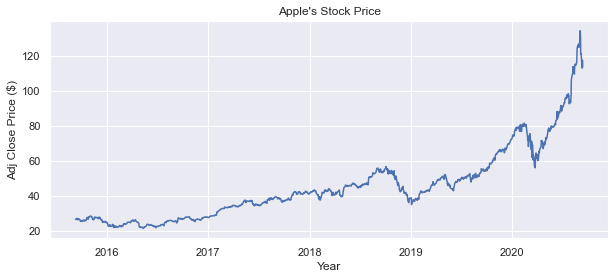

In [210]:
#Visualize historical price
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock Price")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(apple["Adj Close"])
plt.show()

I would try to predict next day stock price based on today's features, so I would shift Adj Close column by (-1). This would make features from one time stamp (t) having Adj close price at next time stamp (t+1).

In [211]:
apple['Adj Close'] = apple['Adj Close'].shift(-1)
#drop last column since shifting Adj Close -1 would make last column of Adj Close have missing value
apple = apple[:-1]
#I will use Adj Close, so dropping Close to avoid confusion
drops = ['Close']
apple = apple.drop(drops,1)

In [212]:
apple.head()

,Date,Open,High,Low,Adj Close,Volume,12-day EMA,26-day EMA,MACD line,Signal line,MACD histogram,Up,Down,SMA Up,SMA Down,RS,RSI,Year
Year,,,,,,,,,,,,,,,,,,
2015-09-11,9/11/2015,27.947500,28.552500,27.940001,26.6399,199662000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-11
2015-09-14,9/14/2015,29.145000,29.222500,28.715000,26.8640,233453600,NaN,NaN,NaN,NaN,NaN,0.2541,0.0000,NaN,NaN,NaN,NaN,2015-09-14
2015-09-15,9/15/2015,28.982500,29.132500,28.605000,26.8940,173364800,NaN,NaN,NaN,NaN,NaN,0.2241,0.0000,NaN,NaN,NaN,NaN,2015-09-15
2015-09-16,9/16/2015,29.062500,29.135000,28.860001,26.3188,148694000,NaN,NaN,NaN,NaN,NaN,0.0300,0.0000,NaN,NaN,NaN,NaN,2015-09-16
2015-09-17,9/17/2015,28.915001,29.122499,28.430000,26.2102,256450400,NaN,NaN,NaN,NaN,NaN,0.0000,0.5753,NaN,NaN,NaN,NaN,2015-09-17


In [213]:
#Set up X as features and y as target object
y_a = apple["Adj Close"]
features = ['Open', 'High', 'Low', 'Volume', 'MACD histogram', 'RSI']
X_a = apple[features]

In [214]:
#split data into train and validation sets. Since this data is stock price, I split 1105 first rows (85% of total value) as 
#train and the rest as validation
train_a = apple[:1105]
valid_a = apple[1105:]

X_train_a = train_a[features]
y_train_a = train_a['Adj Close']
X_val_a = valid_a[features]
y_val_a = valid_a['Adj Close']

In [215]:
# shapes of training set
print('\n Shape of training set:')
print(X_train_a.shape)
print(y_train_a.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(X_val_a.shape)
print(y_val_a.shape)


 Shape of training set:
(1105, 6)
(1105,)

 Shape of validation set:
(153, 6)
(153,)


In [216]:
#Cleaning Data
missing_val_count_by_column = (X_train_a.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MACD histogram    33
RSI               14
dtype: int64


In [96]:
#There are missing data in MACD histogram and RSI, since I cannot calculate the exponantial and simple moving average for the 
#beginning of the data. I will clean the missing data using imputation.

In [217]:
#Check Mean Absolute Error (on RandomForestRegressor) to figure out the best imputation strategy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train_a, X_val_a, y_train_a, y_val_a):
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    model.fit(X_train_a, y_train_a)
    preds = model.predict(X_val_a)
    return mean_absolute_error(y_val_a, preds)

#Use Imputation. Only need to use on X_train, since X_val only contains data at the end of the dataset
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
imputed_X_train_a = pd.DataFrame(imputer.fit_transform(X_train_a))

# Imputation removed column names; put them back
imputed_X_train_a.columns = X_train_a.columns

print("MAE (Imputation):")
print(score_dataset(imputed_X_train_a, X_val_a, y_train_a, y_val_a))
#SimpleImputer(strategy = 'median') gives the lowest MEA for Decision Tree, so I will try applying this to clean missing data

MAE (Imputation):
11.813809673202607


In [218]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [220]:
# Model - First, I will use Decision Tree algorithm
apple_dt = DecisionTreeRegressor(random_state=1)
# Fit Model
apple_dt.fit(imputed_X_train_a, y_train_a)
# Prediction
val_predictions_a = apple_dt.predict(X_val_a)

In [221]:
# Calculate mean absolute error
val_mae = mean_absolute_error(val_predictions_a, y_val_a)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 11


In [223]:
#Comparing different tree size to see if any tree size is better than when not specifying one
def get_mae(max_leaf_nodes, imputed_X_train_a, X_val_a, y_train_a, y_val_a):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(imputed_X_train_a, y_train_a)
    preds_val_a = model.predict(X_val_a)
    mae = mean_absolute_error(y_val_a, preds_val_a)
    return(mae)
candidate_max_leaf_nodes = [5, 10, 30, 45, 50, 100, 500, 10000]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, imputed_X_train_a, X_val_a, y_train_a, y_val_a)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  18
Max leaf nodes: 10  		 Mean Absolute Error:  13
Max leaf nodes: 30  		 Mean Absolute Error:  12
Max leaf nodes: 45  		 Mean Absolute Error:  12
Max leaf nodes: 50  		 Mean Absolute Error:  11
Max leaf nodes: 100  		 Mean Absolute Error:  11
Max leaf nodes: 500  		 Mean Absolute Error:  11
Max leaf nodes: 10000  		 Mean Absolute Error:  11


In [232]:
#Specifying max_leaf_nodes to be at least 50 would give about the same result of not specifying max_leaf_nodes
apple_dt = DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
apple_dt.fit(imputed_X_train_a, y_train_a)
val_predictions_a = apple_dt.predict(X_val_a)
val_mae_a = mean_absolute_error(y_val_a,val_predictions_a)
print("MEA for best max_leaf_nodes:")
print(val_mae_a)

MEA for best max_leaf_nodes:
11.131870399548708


C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


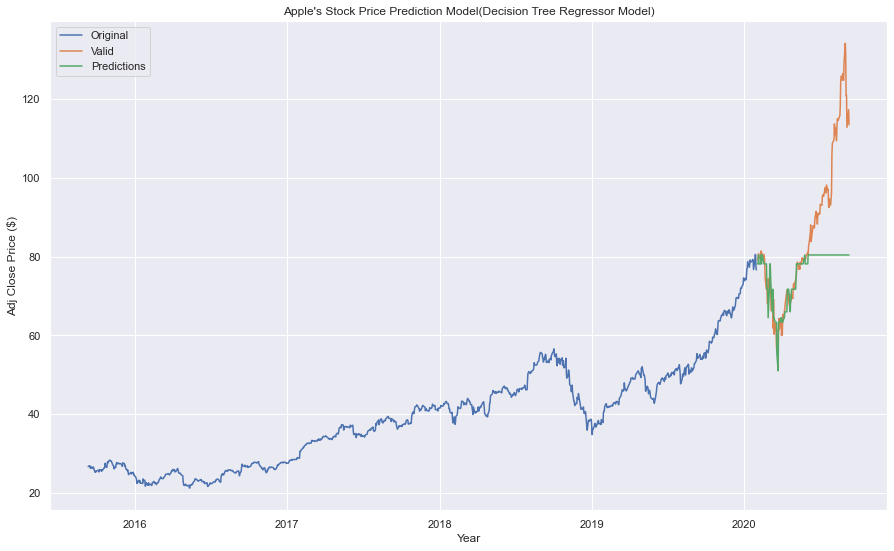

In [233]:
#Visualizing Decision Tree prediction
valid_a['Predictions'] = val_predictions_a
plt.figure(figsize=(15, 9))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_a['Adj Close'])
plt.plot(valid_a[['Adj Close','Predictions']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [234]:
#Next, I will apply Random Forest algorithm
apple_rf = RandomForestRegressor(random_state=1)
apple_rf.fit(imputed_X_train_a,y_train_a)
val_prediction_rf = apple_rf.predict(X_val_a)

C:\Users\Minh Vo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [235]:
apple_val_mae = mean_absolute_error(y_val_a,apple_rf.predict(X_val_a))
#Calculating MEA
print("Validation MAE for Random Forest Model: {}".format(apple_val_mae))

Validation MAE for Random Forest Model: 11.484951699346409


C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


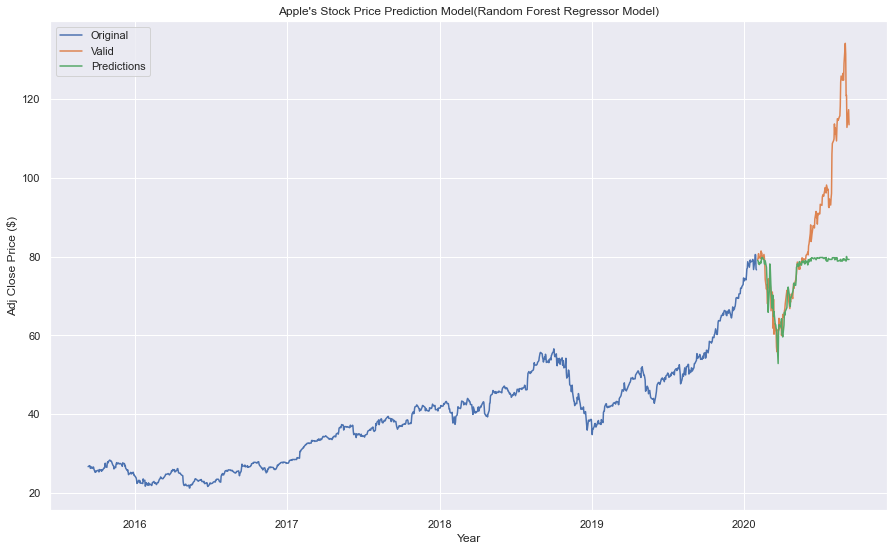

In [236]:
#Visualizing Random Forest prediction
valid_a['Predictions_rf'] = apple_rf.predict(X_val_a)
plt.figure(figsize=(15, 9))
plt.title("Apple's Stock Price Prediction Model(Random Forest Regressor Model)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_a['Adj Close'])
plt.plot(valid_a[['Adj Close','Predictions_rf']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [237]:
#importing K-nearest neighbors library
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [238]:
#scaling data
X_train_scaled_a = scaler.fit_transform(imputed_X_train_a)
X_training_a = pd.DataFrame(X_train_scaled_a)
X_valid_scaled_a = scaler.fit_transform(X_val_a)
X_valid_a = pd.DataFrame(X_valid_scaled_a)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_training_a,y_train_a)
predictions = model.predict(X_valid_a)

In [241]:
mae = mean_absolute_error(y_val_a,predictions)
mae

42.49498786181139

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


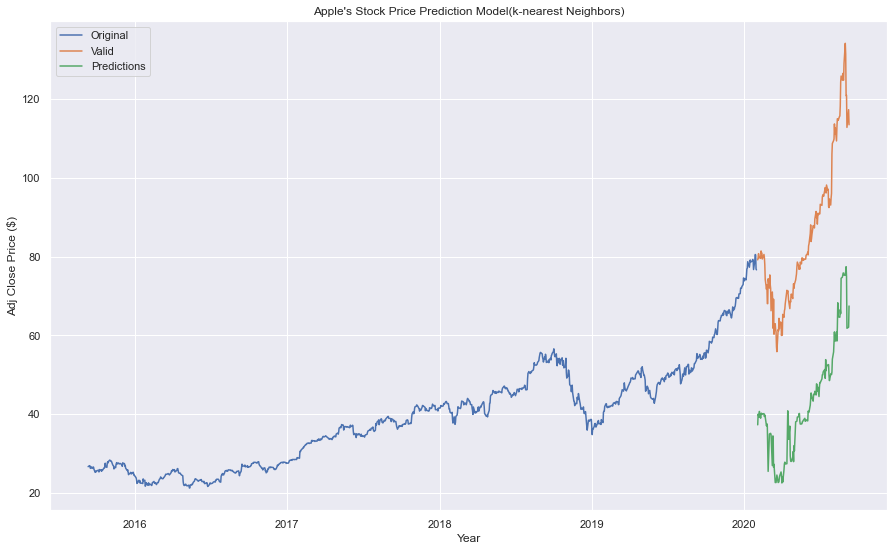

In [242]:
#plot
valid_a['Predictions_k'] = predictions
plt.figure(figsize=(15, 9))
plt.title("Apple's Stock Price Prediction Model(k-nearest Neighbors)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_a['Adj Close'])
plt.plot(valid_a[['Adj Close','Predictions_k']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [301]:
from pmdarima.arima import auto_arima

#sort data into ascending order and create new data so that original data is unaffected
data_a = apple.sort_index(ascending=True, axis=0)

train_arima_a = data_a[:1105]
valid_arima_a = data_a[1105:]

training_arima_a = train_arima_a['Adj Close']
validation_arima_a = valid_arima_a['Adj Close']

model = auto_arima(training_arima_a, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_arima_a)

forecast = model.predict(n_periods=153)
forecast = pd.DataFrame(forecast,index = valid_arima_a.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2180.572, BIC=2205.551, Fit time=9.766 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2831.809, BIC=2841.801, Fit time=0.213 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2570.333, BIC=2590.316, Fit time=1.968 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2179.422, BIC=2199.405, Fit time=4.888 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2181.159, BIC=2206.138, Fit time=7.742 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2833.725, BIC=2848.712, Fit time=0.477 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=2181.132, BIC=2206.111, Fit time=17.720 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2182.176, BIC=2212.150, Fit time=39.670 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=2177.434, BIC=2192.421, Fit time=3.544 seconds
Fit ARIMA: order=(0, 1, 0)

In [304]:
mae = mean_absolute_error(y_val_a,forecast)
mae

11.128750949391991

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


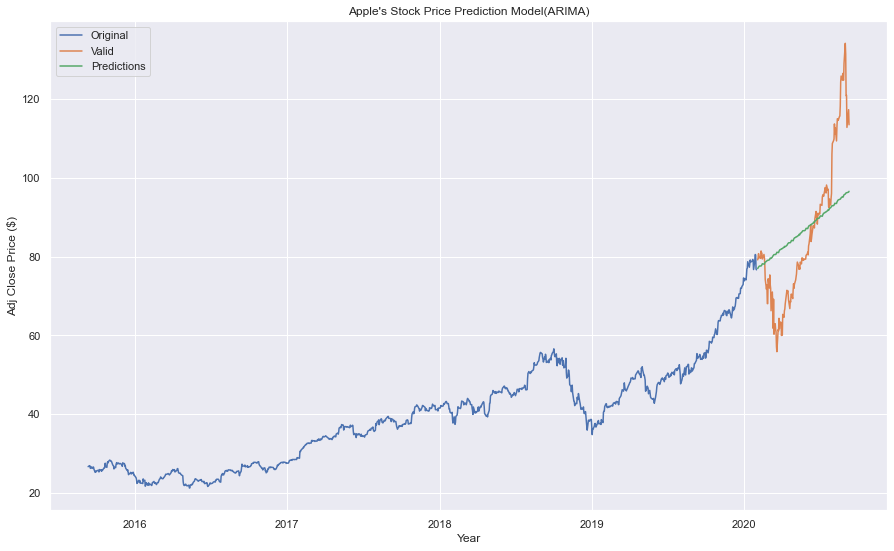

In [305]:
#plot
valid_a['Predictions_arima'] = forecast
plt.figure(figsize=(15, 9))
plt.title("Apple's Stock Price Prediction Model(ARIMA)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_a['Adj Close'])
plt.plot(valid_a[['Adj Close','Predictions_arima']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [243]:
from fbprophet import Prophet
#Creating new data: time series with year and Adj Close for prophet
new_data_a = pd.DataFrame(index=range(0,len(apple)),columns=['Year', 'Adj Close'])

for i in range(0,len(new_data)):
    new_data_a['Year'][i] = apple['Year'][i]
    new_data_a['Adj Close'][i] = apple['Adj Close'][i]
    
new_data_a['Year'] = pd.to_datetime(new_data_a.Year,format='%m/%d/%Y')
new_data_a.index=new_data_a['Year']

#preparing data to y and ds form
new_data_a.rename(columns={'Adj Close': 'y', 'Year': 'ds'}, inplace=True)
new_data_a.dropna()

#train and validation
train = new_data_a[:1105]
valid = new_data_a[1105:]

#fit the model
model = Prophet(daily_seasonality=True)
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast_2 = model.predict(close_prices)

C:\Users\Minh Vo\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [244]:
forecast_valid = forecast_2['yhat'][1105:]
mae = mean_absolute_error(y_val_a,forecast_valid)
mae

13.646571885895778

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


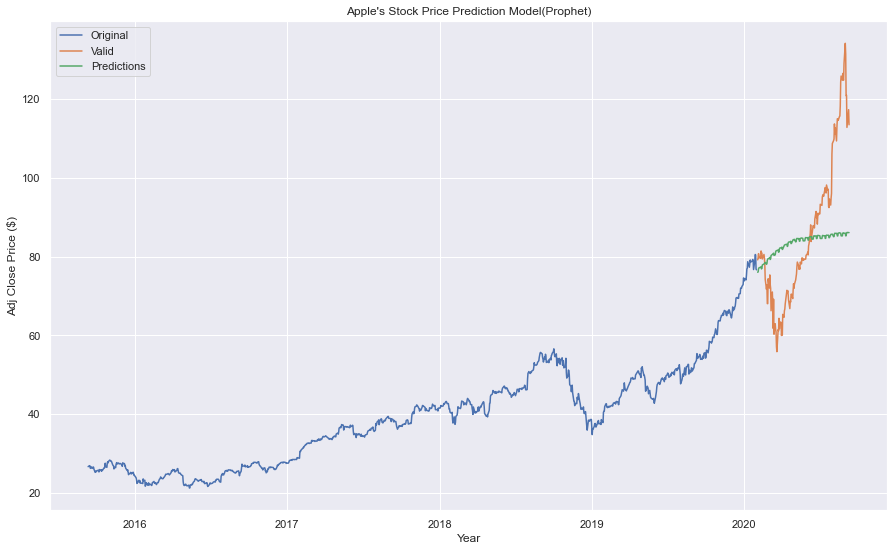

In [245]:
#plot
valid['Predictions_Prophet'] = forecast_valid.values
plt.figure(figsize=(15, 9))
plt.title("Apple's Stock Price Prediction Model(Prophet)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train['y'])
plt.plot(valid[['y','Predictions_Prophet']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

## Dow Jones

In [246]:
dow = pd.read_csv("Dow Jones 30.csv")

In [247]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume,12-day EMA,26-day EMA,MACD line,Signal line,MACD histogram,Up,Down,SMA Up,SMA Down,RS,RSI
0,9/14/2015,16450.85938,16450.85938,16330.87012,16370.95996,16370.95996,92660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/15/2015,16382.58008,16644.10938,16382.58008,16599.84961,16599.84961,93050000,NaN,NaN,NaN,NaN,NaN,228.889648,0.000000,NaN,NaN,NaN,NaN
2,9/16/2015,16599.50977,16755.98047,16593.90039,16739.94922,16739.94922,99620000,NaN,NaN,NaN,NaN,NaN,140.099610,0.000000,NaN,NaN,NaN,NaN
3,9/17/2015,16738.08008,16933.42969,16639.92969,16674.74023,16674.74023,129600000,NaN,NaN,NaN,NaN,NaN,0.000000,65.208985,NaN,NaN,NaN,NaN
4,9/18/2015,16674.74023,16674.74023,16343.75977,16384.58008,16384.58008,341690000,NaN,NaN,NaN,NaN,NaN,0.000000,290.160156,NaN,NaN,NaN,NaN


In [248]:
dow.describe()

,Open,High,Low,Close,Adj Close,Volume,12-day EMA,26-day EMA,MACD line,Signal line,MACD histogram,Up,Down,SMA Up,SMA Down,RS,RSI
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1248.000000,1234.000000,1234.000000,1226.000000,1226.000000,1258.000000,1258.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,22894.638687,23013.136061,22766.946204,22897.692920,22897.692920,2.813872e+08,22903.984130,22910.947785,64.524979,62.805347,-0.066084,88.267483,79.289200,88.083130,78.544148,2.133796,57.897737
std,3698.993741,3716.379249,3677.547229,3694.909925,3694.909925,1.516766e+08,3639.585122,3577.719204,301.805739,282.123230,96.451180,171.097906,205.995934,75.097322,107.932343,2.682098,17.287464
min,15691.620120,15897.820310,15450.559570,15660.179690,15660.179690,4.035000e+07,16059.521230,16270.502870,-2305.886266,-1919.816734,-556.506467,0.000000,0.000000,11.427176,1.799944,0.078594,7.286707
25%,19595.644530,19711.355465,19185.735350,19582.214845,19582.214845,1.875800e+08,19759.014843,19690.528513,-27.054034,-23.743932,-35.698811,0.000000,0.000000,46.624163,26.120675,0.837248,45.570762
50%,24064.189450,24264.210940,23808.189450,24024.130860,24024.130860,2.797600e+08,24099.940835,24161.733830,119.621523,113.062983,3.993874,16.160156,0.000000,69.835100,44.645647,1.356416,57.562679
75%,25943.254885,26069.645505,25767.300780,25923.044925,25923.044925,3.474000e+08,25880.452675,25738.213847,218.335212,207.683300,38.322377,117.191406,70.907227,102.288505,95.684291,2.522374,71.610056
max,29440.470700,29568.570310,29406.750000,29551.419920,29551.419920,2.190810e+09,29225.798700,29056.615560,863.814100,679.910065,536.040164,2112.980468,2997.099610,596.393694,935.147182,43.112850,97.733087


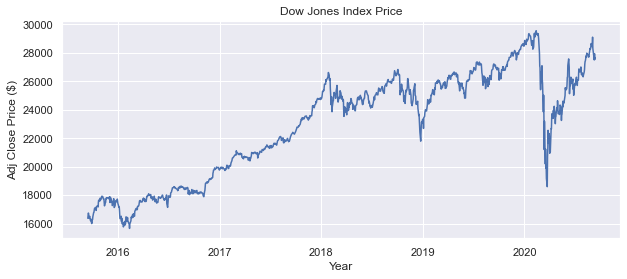

In [249]:
#set date to correct format
import datetime
dow['Year'] = pd.to_datetime(dow.Date,format='%m/%d/%Y')
dow.index=dow['Year']
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#Visualize historical price
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Dow Jones Index Price")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(dow["Adj Close"])
plt.show()

Same as with Apple, I will shift Adj Close of Dow by (-1) to predict tomorrow's price based on today's features.

In [250]:
dow['Adj Close'] = dow['Adj Close'].shift(-1)
#drop last column since shifting Adj Close -1 would make last column of Adj Close have missing value
dow = dow[:-1]
#I will use Adj Close, so dropping Close to avoid confusion
drops = ['Close']
dow = dow.drop(drops,1)

In [251]:
dow.head()

,Date,Open,High,Low,Adj Close,Volume,12-day EMA,26-day EMA,MACD line,Signal line,MACD histogram,Up,Down,SMA Up,SMA Down,RS,RSI,Year
Year,,,,,,,,,,,,,,,,,,
2015-09-14,9/14/2015,16450.85938,16450.85938,16330.87012,16599.84961,92660000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-14
2015-09-15,9/15/2015,16382.58008,16644.10938,16382.58008,16739.94922,93050000,NaN,NaN,NaN,NaN,NaN,228.889648,0.000000,NaN,NaN,NaN,NaN,2015-09-15
2015-09-16,9/16/2015,16599.50977,16755.98047,16593.90039,16674.74023,99620000,NaN,NaN,NaN,NaN,NaN,140.099610,0.000000,NaN,NaN,NaN,NaN,2015-09-16
2015-09-17,9/17/2015,16738.08008,16933.42969,16639.92969,16384.58008,129600000,NaN,NaN,NaN,NaN,NaN,0.000000,65.208985,NaN,NaN,NaN,NaN,2015-09-17
2015-09-18,9/18/2015,16674.74023,16674.74023,16343.75977,16510.18945,341690000,NaN,NaN,NaN,NaN,NaN,0.000000,290.160156,NaN,NaN,NaN,NaN,2015-09-18


In [252]:
#Set up X as features and y as target object
y_dj = dow["Adj Close"]
features = ['Open', 'High', 'Low', 'Volume', 'MACD histogram', 'RSI']
X_dj = dow[features]

In [254]:
#split data into train and validation sets.
train_dj = dow[:1105]
valid_dj = dow[1105:]

X_train_dj = train_dj[features]
y_train_dj = train_dj['Adj Close']
X_val_dj = valid_dj[features]
y_val_dj = valid_dj['Adj Close']

In [258]:
X_train_dj.tail()

,Open,High,Low,Volume,MACD histogram,RSI
Year,,,,,,
2020-01-28,28594.27930,28823.23047,28575.75000,330140000,-70.943532,53.427781
2020-01-29,28820.52930,28944.24023,28728.18945,302290000,-77.808937,49.717038
2020-01-30,28640.16016,28879.71094,28489.75977,326850000,-71.992959,47.282786
2020-01-31,28813.03906,28813.03906,28169.52930,403890000,-104.854143,37.459782
2020-02-03,28319.65039,28630.39063,28319.65039,307910000,-112.311792,39.087749


In [260]:
# shapes of training set
print('\n Shape of training set:')
print(X_train_dj.shape)
print(y_train_dj.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(X_val_dj.shape)
print(y_val_dj.shape)


 Shape of training set:
(1105, 6)
(1105,)

 Shape of validation set:
(153, 6)
(153,)


In [261]:
#Cleaning Data
missing_val_count_by_column = (X_train_dj.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MACD histogram    33
RSI               14
dtype: int64


In [262]:
#Check Mean Absolute Error (on RandomForestRegressor) to figure out the best imputation strategy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train_dj, X_val_dj, y_train_dj, y_val_dj):
    model = RandomForestRegressor(n_estimators=100, random_state=1)
    model.fit(X_train_dj, y_train_dj)
    preds_dj = model.predict(X_val_dj)
    return mean_absolute_error(y_val_dj, preds_dj)

#Use Imputation. Only need to use on X_train, since X_val only contains data at the end of the dataset
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'constant')
imputed_X_train_dj = pd.DataFrame(imputer.fit_transform(X_train_dj))

# Imputation removed column names; put them back
imputed_X_train_dj.columns = X_train_dj.columns

print("MAE (Imputation):")
print(score_dataset(imputed_X_train_dj, X_val_dj, y_train_dj, y_val_dj))
#SimpleImputer(strategy = 'constant') gives the lowest MEA for Decision Tree, so I will try applying this to clean missing data

MAE (Imputation):
472.119694381045


In [264]:
# Model - First, I will use Decision Tree algorithm
dow_dt = DecisionTreeRegressor(random_state=1)
# Fit Model
dow_dt.fit(imputed_X_train_dj, y_train_dj)
# Prediction
val_predictions_dj = dow_dt.predict(X_val_dj)

In [265]:
val_mae = mean_absolute_error(val_predictions_dj, y_val_dj)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 564


In [289]:
#Comparing different tree size to see if any tree size is better than when not specifying one
def get_mae(max_leaf_nodes, imputed_X_train_dj, X_val_dj, y_train_dj, y_val_dj):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(imputed_X_train_dj, y_train_dj)
    preds_val_dj = model.predict(X_val_dj)
    mae = mean_absolute_error(y_val_dj, preds_val_dj)
    return(mae)
candidate_max_leaf_nodes = [5, 10, 32, 33, 34, 100, 500, 1000]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, imputed_X_train_dj, X_val_dj, y_train_dj, y_val_dj)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  801
Max leaf nodes: 10  		 Mean Absolute Error:  629
Max leaf nodes: 32  		 Mean Absolute Error:  500
Max leaf nodes: 33  		 Mean Absolute Error:  497
Max leaf nodes: 34  		 Mean Absolute Error:  499
Max leaf nodes: 100  		 Mean Absolute Error:  551
Max leaf nodes: 500  		 Mean Absolute Error:  565
Max leaf nodes: 1000  		 Mean Absolute Error:  571


In [290]:
#Specifying max_leaf_nodes to be 56 would give better result than not specifying max_leaf_nodes
dow_dt = DecisionTreeRegressor(max_leaf_nodes=33, random_state=1)
dow_dt.fit(imputed_X_train_dj, y_train_dj)
val_predictions_dj = dow_dt.predict(X_val_dj)
val_mae_dj = mean_absolute_error(y_val_dj,val_predictions_dj)
print("MEA for best max_leaf_nodes:")
print(val_mae_dj)

MEA for best max_leaf_nodes:
491.78889321776705


C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


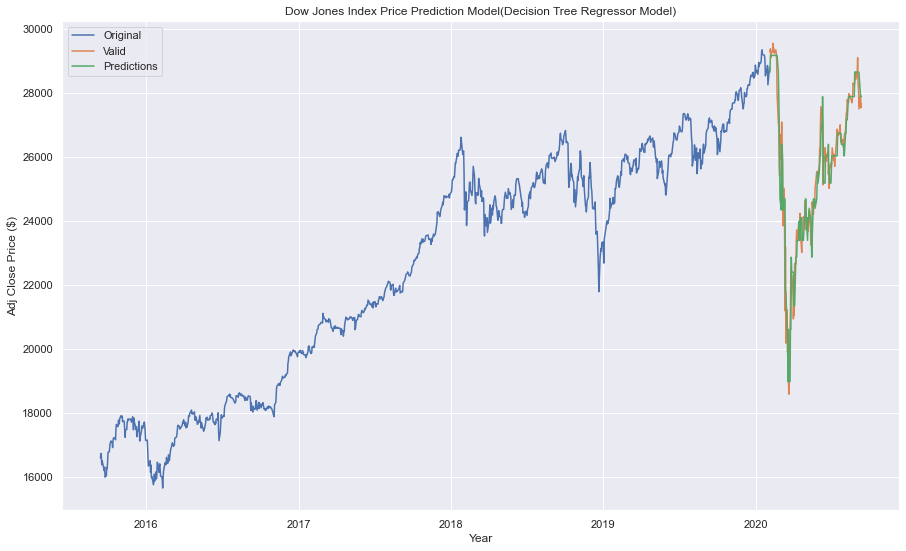

In [291]:
#Visualizing Decision Tree prediction
valid_dj['Predictions'] = val_predictions_dj
plt.figure(figsize=(15, 9))
plt.title("Dow Jones Index Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_dj['Adj Close'])
plt.plot(valid_dj[['Adj Close','Predictions']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [292]:
#Next, I will apply Random Forest algorithm
dow_rf = RandomForestRegressor(random_state=1)
dow_rf.fit(imputed_X_train_dj,y_train_dj)

C:\Users\Minh Vo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [293]:
dow_val_mae = mean_absolute_error(y_val_dj,dow_rf.predict(X_val_dj))
#Calculating MEA
print("Validation MAE for Random Forest Model: {}".format(dow_val_mae))

Validation MAE for Random Forest Model: 468.64845623529413


In [294]:
#MAE comparison between Decision Tree and Random Forest: Random Forest gives slightly lower MAE, meaning Random Forest fits 
#this model more.

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


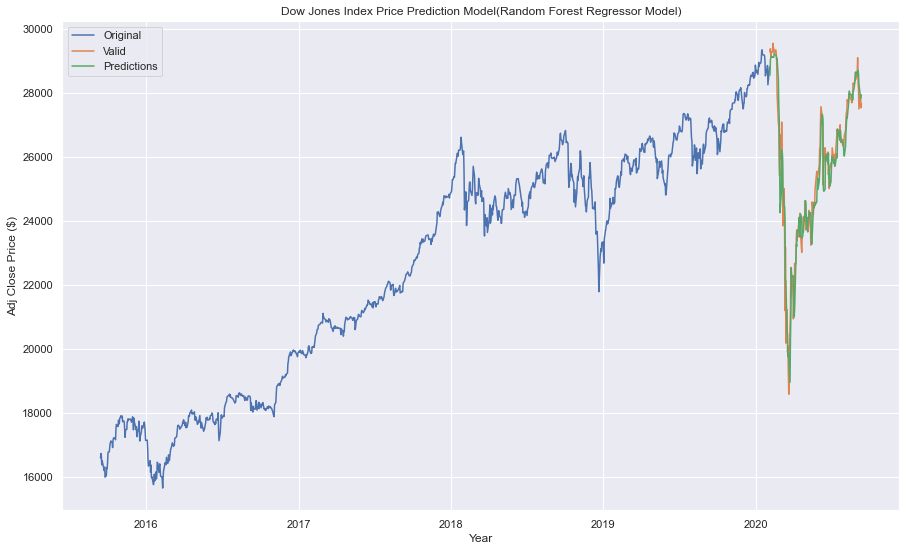

In [295]:
#Visualizing Random Forest prediction
valid_dj['Predictions_rf'] = dow_rf.predict(X_val_dj)
plt.figure(figsize=(15, 9))
plt.title("Dow Jones Index Price Prediction Model(Random Forest Regressor Model)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_dj['Adj Close'])
plt.plot(valid_dj[['Adj Close','Predictions_rf']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [296]:
#importing K-nearest neighbors library
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [298]:
#scaling data
X_train_scaled_dj = scaler.fit_transform(imputed_X_train_dj)
X_train_dj = pd.DataFrame(X_train_scaled_dj)
X_valid_scaled_dj = scaler.fit_transform(X_val_dj)
X_valid_dj = pd.DataFrame(X_valid_scaled_dj)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train_dj,y_train_dj)
predictions_dj_k = model.predict(X_valid_dj)

In [299]:
mae = mean_absolute_error(y_val_dj,predictions_dj_k)
mae

1284.4782757124183

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


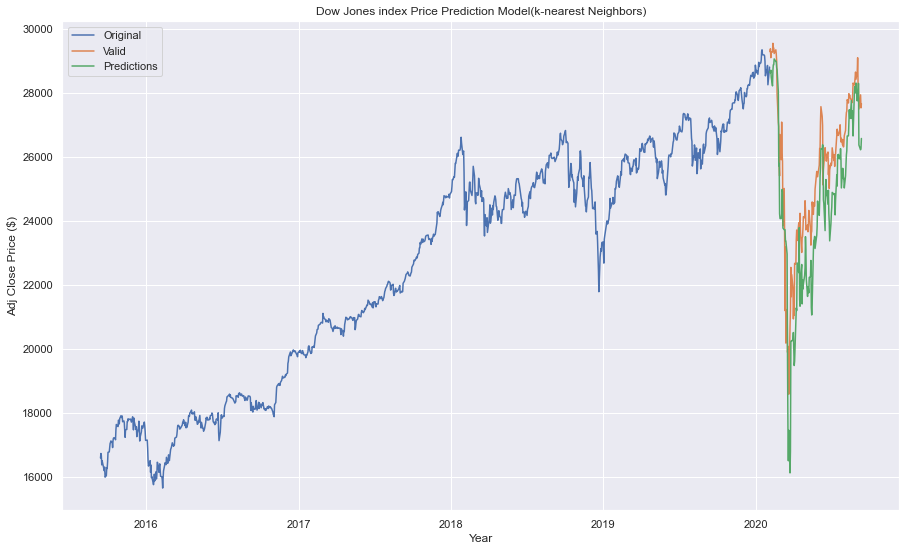

In [300]:
#plot
valid_dj['Predictions_k'] = predictions_dj_k
plt.figure(figsize=(15, 9))
plt.title("Dow Jones index Price Prediction Model(k-nearest Neighbors)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_dj['Adj Close'])
plt.plot(valid_dj[['Adj Close','Predictions_k']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [306]:
#sort data into ascending order and create new data so that original data is unaffected
data_dj = dow.sort_index(ascending=True, axis=0)

train_arima_dj = data_dj[:1105]
valid_arima_dj = data_dj[1105:]

training_arima_dj = train_arima_dj['Adj Close']
validation_arima_dj = valid_arima_dj['Adj Close']

model = auto_arima(training_arima_dj, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training_arima_dj)

forecast_dj = model.predict(n_periods=153)
forecast_dj = pd.DataFrame(forecast_dj,index = valid_arima_dj.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14618.296, BIC=14643.275, Fit time=12.407 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15294.840, BIC=15304.831, Fit time=0.155 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=15040.657, BIC=15060.640, Fit time=2.910 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14621.009, BIC=14640.992, Fit time=2.632 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=14621.327, BIC=14651.301, Fit time=11.164 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=15298.769, BIC=15318.752, Fit time=0.293 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=14619.533, BIC=14649.507, Fit time=46.937 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=14622.101, BIC=14657.072, Fit time=49.436 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=14619.948, BIC=14649.922, Fit time=20.576 seconds
Fit A

In [307]:
mae = mean_absolute_error(y_val_dj,forecast_dj)
mae

3491.5669587435577

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


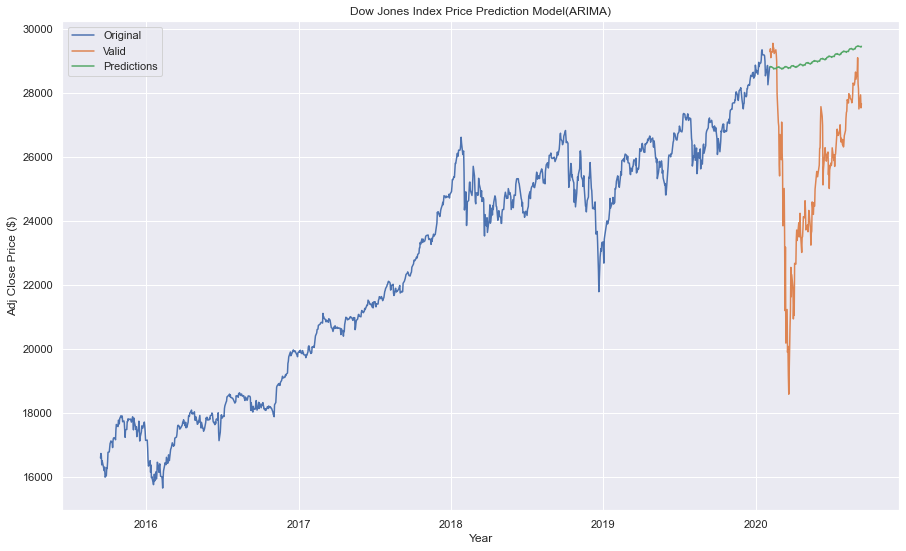

In [308]:
#plot
valid_dj['Predictions_arima'] = forecast_dj
plt.figure(figsize=(15, 9))
plt.title("Dow Jones Index Price Prediction Model(ARIMA)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_dj['Adj Close'])
plt.plot(valid_dj[['Adj Close','Predictions_arima']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

In [309]:
from fbprophet import Prophet
#Creating new data: time series with year and Adj Close for prophet
new_data_dj = pd.DataFrame(index=range(0,len(dow)),columns=['Year', 'Adj Close'])

for i in range(0,len(data)):
    new_data_dj['Year'][i] = dow['Year'][i]
    new_data_dj['Adj Close'][i] = dow['Adj Close'][i]
    
new_data_dj['Year'] = pd.to_datetime(new_data_dj.Year,format='%m/%d/%Y')
new_data_dj.index=new_data_dj['Year']

#preparing data to y and ds form
new_data_dj.rename(columns={'Adj Close': 'y', 'Year': 'ds'}, inplace=True)

#train and validation
train_pr = new_data_dj[:1105]
valid_pr = new_data_dj[1105:]

#fit the model
model = Prophet(daily_seasonality=True)
model.fit(train_pr)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid_pr))
forecast_2_dj = model.predict(close_prices)

C:\Users\Minh Vo\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [310]:
forecast_valid_dj = forecast_2_dj['yhat'][1105:]
mae = mean_absolute_error(y_val_dj,forecast_valid_dj)
mae

4327.612685790688

C:\Users\Minh Vo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


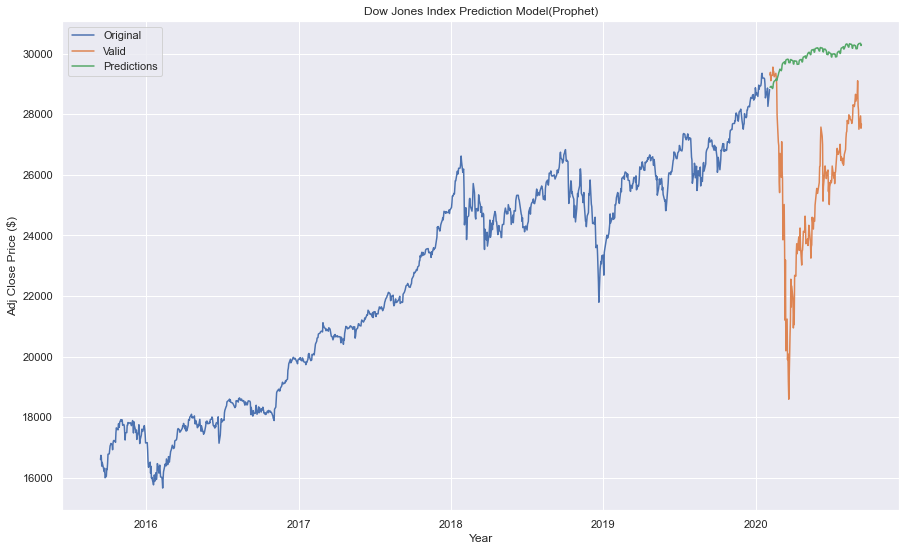

In [311]:
#plot
valid_pr['Predictions_Prophet'] = forecast_valid_dj.values
plt.figure(figsize=(15, 9))
plt.title("Dow Jones Index Prediction Model(Prophet)")
plt.xlabel("Year")
plt.ylabel("Adj Close Price ($)")
plt.plot(train_pr['y'])
plt.plot(valid_pr[['y','Predictions_Prophet']])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()